In [ ]:
#!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

from pandas_datareader.data import DataReader
import yfinance as yf

from datetime import datetime

In [3]:
tech_list=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start = datetime(end.year-1, end.month, end.day)

#this will create variables of each stock consisting data of respective stocks
for stock in tech_list:
  globals()[stock]= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
GOOG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-15,150.000000,150.477005,148.652496,149.388000,149.388000,16248000
2021-11-16,149.170502,149.832504,148.350006,149.076004,149.076004,17254000
2021-11-17,149.229004,149.626007,148.563004,149.061996,149.061996,15290000
2021-11-18,149.145996,151.610001,148.998505,150.709000,150.709000,26658000
2021-11-19,151.000000,151.850006,149.887497,149.952499,149.952499,19766000
...,...,...,...,...,...,...
2022-11-08,89.160004,90.404999,87.650002,88.910004,88.910004,30172000
2022-11-09,88.544998,89.489998,87.360001,87.400002,87.400002,26743900
2022-11-10,92.339996,94.550003,91.650002,94.169998,94.169998,42371200


In [5]:
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=['APPLE','GOOGLE','MICROSOFT','AMAZON']

for company, com_name in zip(company_list, company_name):
  company['company_name']=com_name # this will create a new column --> company_name

df= pd.concat(company_list,axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000,AMAZON
2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800,AMAZON
2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300,AMAZON
2022-11-04,91.489998,92.440002,88.040001,90.980003,90.980003,128999900,AMAZON
2022-11-07,91.949997,92.099998,89.040001,90.529999,90.529999,77495700,AMAZON
2022-11-08,90.790001,91.720001,88.230003,89.980003,89.980003,88703400,AMAZON
2022-11-09,89.470001,89.480003,85.870003,86.139999,86.139999,90796200,AMAZON
2022-11-10,92.940002,98.690002,91.650002,96.629997,96.629997,173414900,AMAZON
2022-11-11,97.879997,101.190002,96.660004,100.790001,100.790001,111481700,AMAZON


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.133452,160.356429,156.103214,158.310913,157.732308,9.183225e+07
std,12.807260,12.614526,12.843865,12.734846,12.537379,2.606017e+07
min,130.070007,132.389999,129.039993,130.059998,129.664490,5.121820e+07
25%,147.527500,149.844997,145.177502,148.200001,147.891399,7.397692e+07
50%,159.580002,161.970001,156.625000,159.260002,158.614716,8.696845e+07
75%,169.232502,171.057503,167.220001,168.970005,168.350849,1.042215e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.954327e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-15 to 2022-11-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


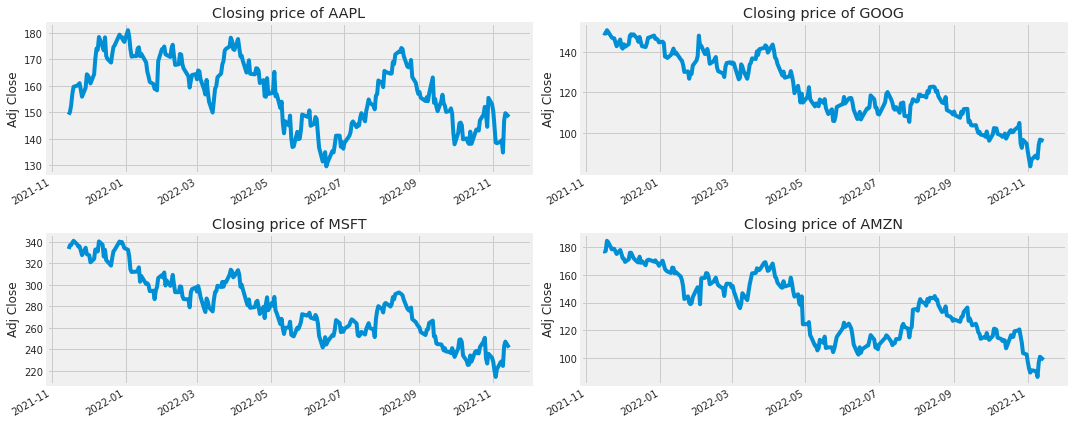

In [8]:
#historical view of closing price

plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing price of {tech_list[i-1]}")

plt.tight_layout()


Total volume of stock being traded each day

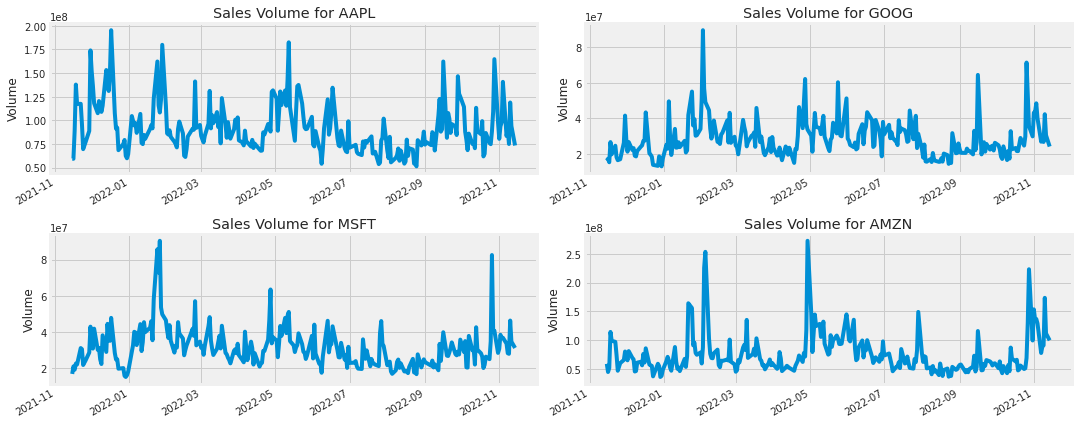

In [9]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25,bottom=1.2)

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i-1]}")

plt.tight_layout()

# Moving average of the stocks

In [10]:
ma_day=[10,20,50]

for ma in ma_day:
  for company in company_list:
    column_name=f"MA for {ma} days"
    company[column_name]=company['Adj Close'].rolling(ma).mean()

In [11]:
print(GOOG.tail())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2022-11-08  89.160004  90.404999  87.650002  88.910004  88.910004  30172000   
2022-11-09  88.544998  89.489998  87.360001  87.400002  87.400002  26743900   
2022-11-10  92.339996  94.550003  91.650002  94.169998  94.169998  42371200   
2022-11-11  94.709999  97.360001  94.160004  96.730003  96.730003  30536500   
2022-11-14  95.500000  97.180000  95.112999  96.029999  96.029999  24156100   

           company_name  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                     
2022-11-08       GOOGLE       90.398000         95.5770        100.3876  
2022-11-09       GOOGLE       89.656001         95.0320         99.9374  
2022-11-10       GOOGLE       89.813000         94.7550         99.6378  
2022-11-11       GOOGLE       89.828001         94.7325         99.3614  
20

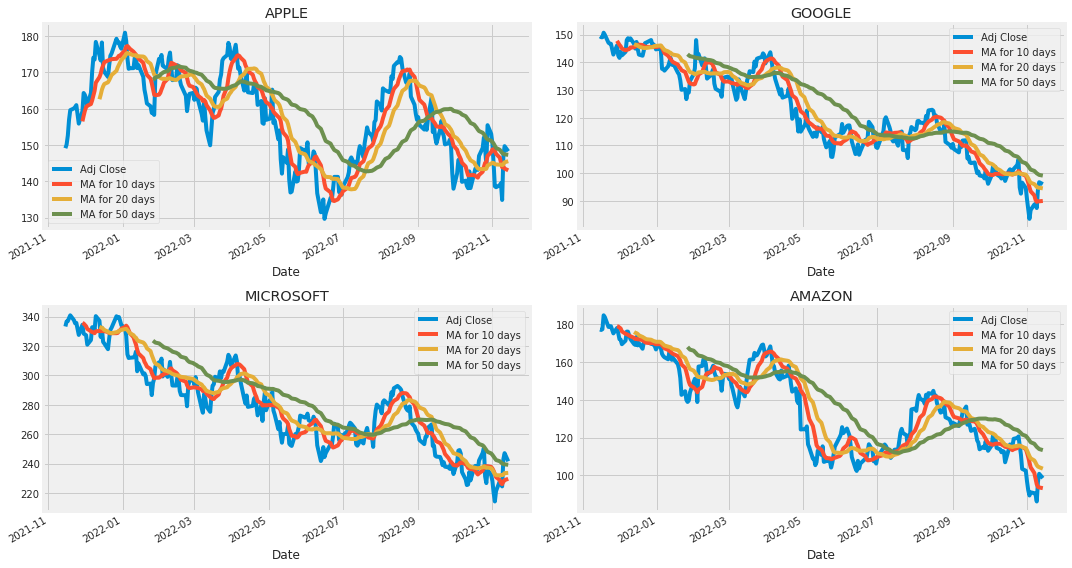

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily return of stock on average

Now we are going to analyze the risk of the stock. In order to do so we will need to take a look closer to the daily changes, and not just absolute value.

In [13]:
for company in company_list:
  company['Daily Return']=company['Adj Close'].pct_change()

In [14]:
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2021-11-15,150.369995,151.880005,149.429993,150.000000,149.134445,59222800,APPLE,NaN,NaN,NaN,NaN
2021-11-16,149.940002,151.490005,149.339996,151.000000,150.128693,59256200,APPLE,NaN,NaN,NaN,0.006667
2021-11-17,151.000000,155.000000,150.990005,153.490005,152.604324,88807000,APPLE,NaN,NaN,NaN,0.016490
2021-11-18,153.710007,158.669998,153.050003,157.869995,156.959030,137827700,APPLE,NaN,NaN,NaN,0.028536
2021-11-19,157.649994,161.020004,156.529999,160.550003,159.623581,117305600,APPLE,NaN,NaN,NaN,0.016976
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500,APPLE,145.287131,144.633145,148.284444,0.004175
2022-11-09,138.500000,138.550003,134.589996,134.869995,134.869995,74917800,APPLE,143.863864,144.471101,147.808907,-0.033190
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000,APPLE,144.094844,144.676940,147.607114,0.088975


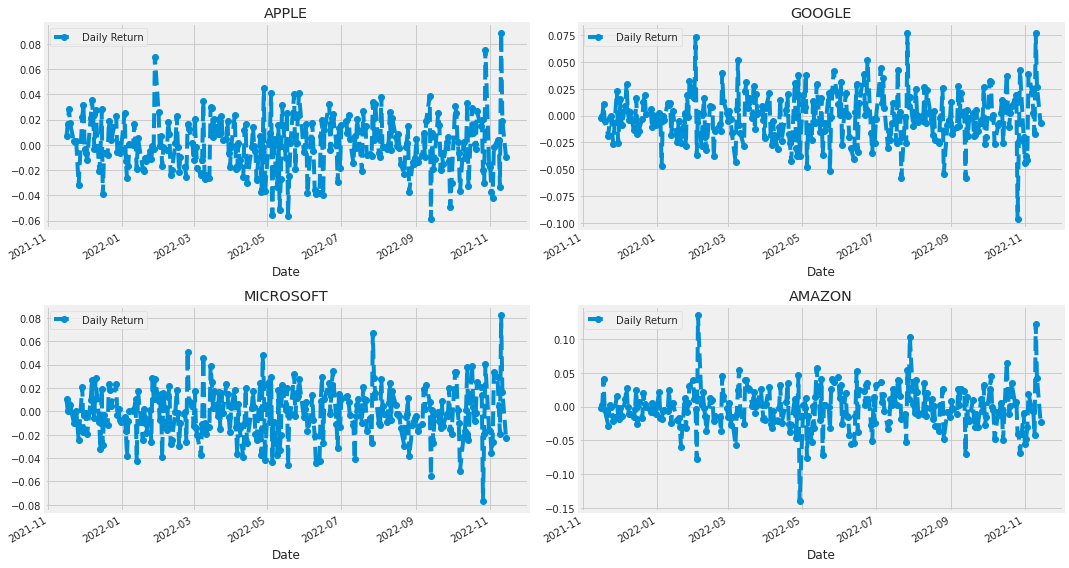

In [15]:
# plotting the daily return percentage

fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')


GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')


MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')


AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Looking at the distribution of the daily average return. 

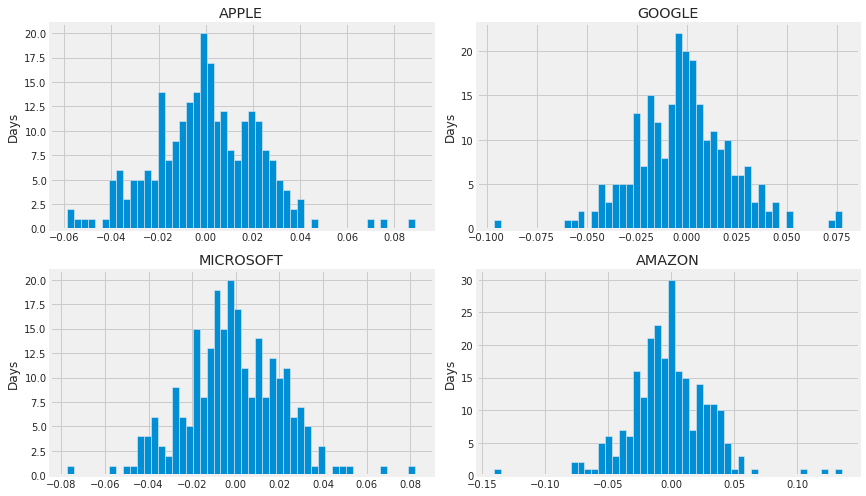

In [16]:
plt.figure(figsize=(12,7))

for i, company in enumerate(company_list,1):
  plt.subplot(2,2,i)
  company['Daily Return'].hist(bins=50)
  plt.ylabel('Days')
  plt.title(f"{company_name[i-1]}")

plt.tight_layout()

# Correlation between stocks closing price

In [17]:
!pip install pandas_datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-15,149.134476,149.388000,333.278778,177.283997
2021-11-16,150.128693,149.076004,336.690216,177.035004
2021-11-17,152.604324,149.061996,336.918732,177.449997
2021-11-18,156.959030,150.709000,339.054779,184.802994
2021-11-19,159.623581,149.952499,340.882782,183.828506


finding Daily return of the stock

In [19]:
tech_rets= closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-15,NaN,NaN,NaN,NaN
2021-11-16,0.006667,-0.002088,0.010236,-0.001404
2021-11-17,0.016490,-0.000094,0.000679,0.002344
2021-11-18,0.028536,0.011049,0.006340,0.041437
2021-11-19,0.016976,-0.005020,0.005391,-0.005273


Plotting scatter plot between companies to check the correlation between the stocks.

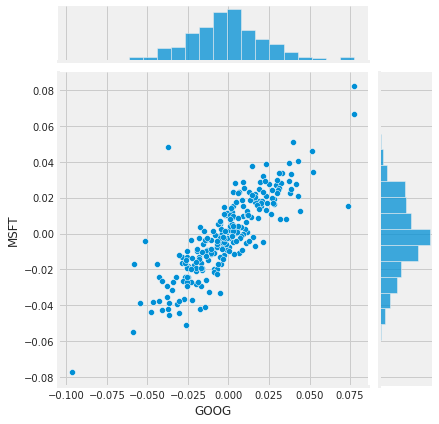

In [20]:
#between google and microsoft
sns.jointplot(x='GOOG',y='MSFT', data=tech_rets, kind='scatter')

Plotting correlation plot between every company. This gives us an idea how correlated the daily returns are. 

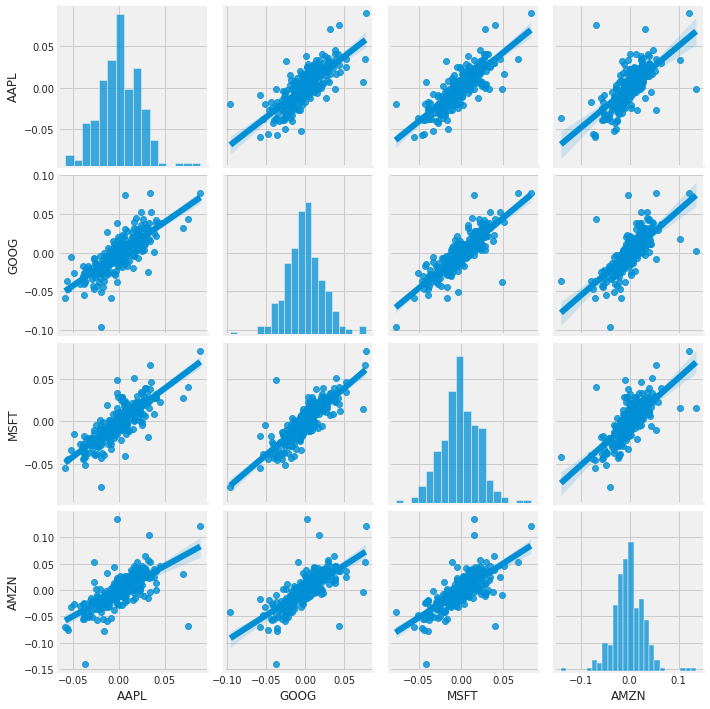

In [21]:
sns.pairplot(tech_rets, kind='reg')

As we can observe relation between the returns of microsoft and google

We can use KDE and scatter plot to analyse the relaton between the returns of the stocks.

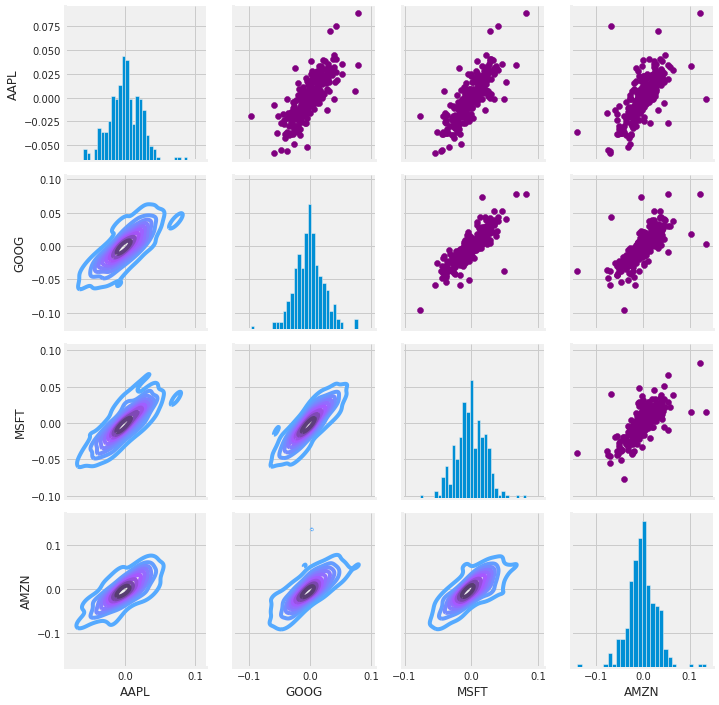

In [22]:
return_fig= sns.PairGrid(tech_rets.dropna())

#upper triangle of the grid
return_fig.map_upper(plt.scatter, color='purple')

#lower traingle of the grid
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#diagonal
return_fig.map_diag(plt.hist, bins=30)

Taking a look at the relation between the closing priceses of the stocks

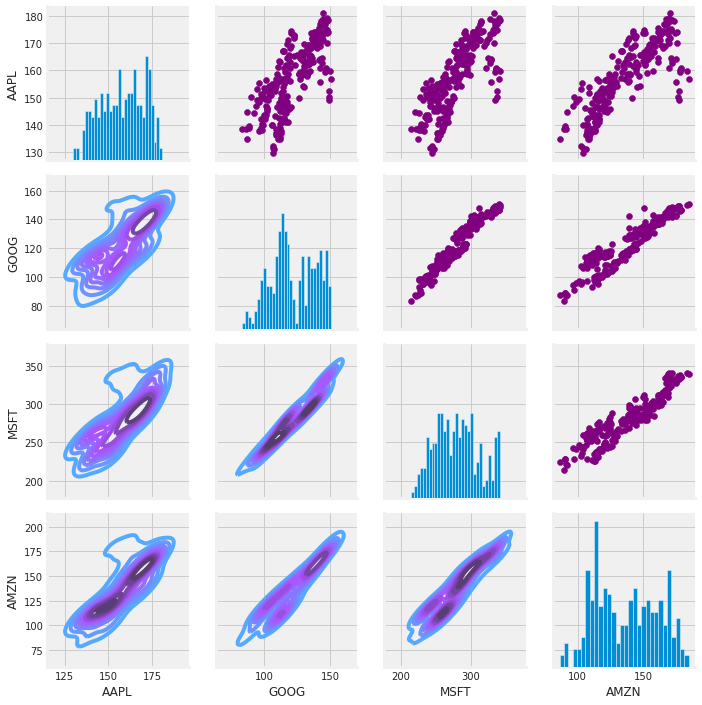

In [23]:
return_fig= sns.PairGrid(closing_df)

#upper triangle of the grid
return_fig.map_upper(plt.scatter, color='purple')

#lower traingle of the grid
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#diagonal
return_fig.map_diag(plt.hist, bins=30)

Plotting heatmap

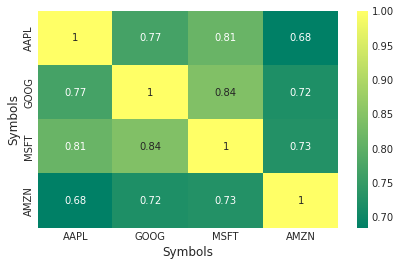

In [24]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

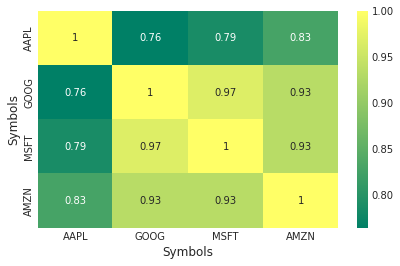

In [25]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

As we can observe from the heatmap and KDE plot, Microsoft and Google are highly correlated. They have strong relation for average returns and closing price. 

# How much value do we put at risk by investing in a perticular stock?

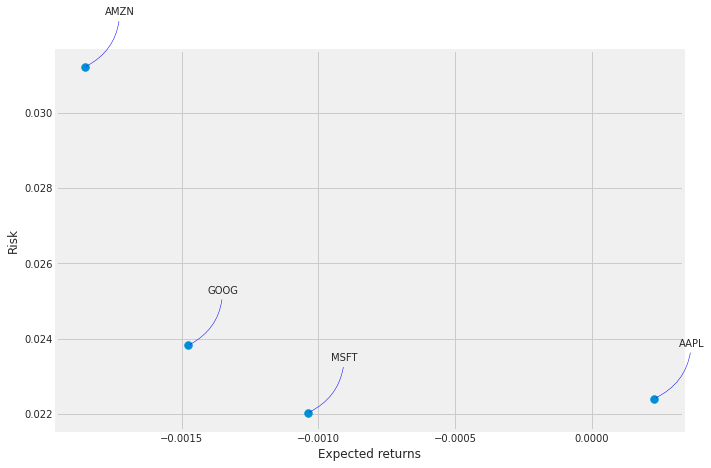

In [26]:
# defining a new dataframe as a cleaned version of the original tech_rets
rets= tech_rets.dropna() #returns

area= np.pi *20
plt.figure(figsize=(10,7))

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

As we can observed from the above graph, investing in Apple will give highest returns and it has the lowest risk as well. Whereas Amazon will give lowest return and it has highest risk as well.

# Predicting the closing price stock of APPLE inc.

In [27]:
datetime.now()

datetime.datetime(2022, 11, 15, 11, 5, 16, 61255)

In [28]:
# fetching the stock
df= DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519281
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586560
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726294
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936
...,...,...,...,...,...,...
2022-11-08,141.429993,137.490005,140.410004,139.500000,89908500.0,139.500000
2022-11-09,138.550003,134.589996,138.500000,134.869995,74917800.0,134.869995
2022-11-10,146.869995,139.500000,141.240005,146.869995,118854000.0,146.869995


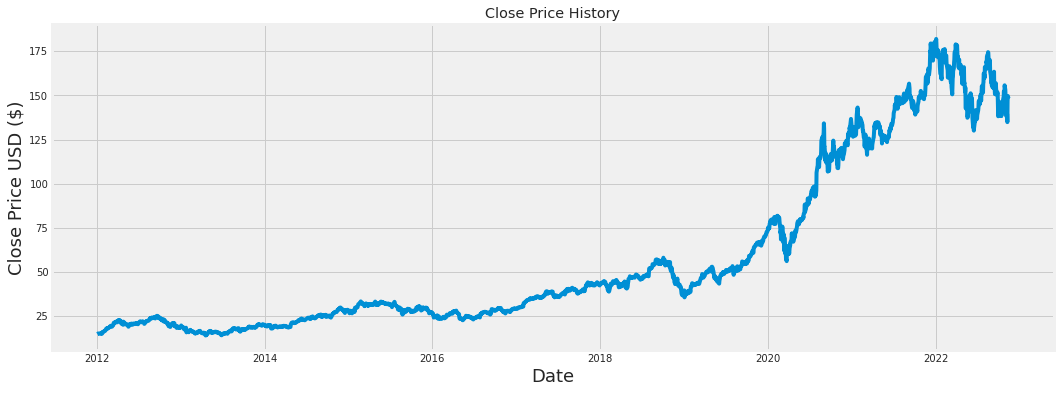

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [83]:
#creating new dataset with only close column
data= df.filter(['Close'])
dataset= data.values # converting dataset to numpy array

training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2600

In [32]:
#scaling dataset
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.79091112],
       [0.8077501 ],
       [0.79930087]])

In [40]:
scaled_data[61]

array([0.044418])

In [84]:
train_data= scaled_data[0:int(training_data_len), :]
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  #starting from 0 and moving 1 step at a time 
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [85]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model= Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1, epochs=1)

2540/2540 [==============================] - 120s 46ms/step - loss: 0.0012


Creating testing data set

In [90]:
# testing data --> last 60 days
test_data= scaled_data[training_data_len-60:,:] # last 60

x_test=[]
y_test= dataset[training_data_len:,:] # last datapoint

for i in range(60, len(test_data)):
  
  x_test.append(test_data[i-60:i,0]) #60,59,58....1

x_test= np.array(x_test)



In [91]:
y_test= dataset[-1:,:] 
y_test

array([[148.27999878]])

In [92]:
x_test[-1]

array([0.9375828 , 0.91407966, 0.91205653, 0.9138416 , 0.92871702,
       0.89057642, 0.87724811, 0.86255118, 0.85249539, 0.85689854,
       0.84410563, 0.83648942, 0.84499821, 0.83607296, 0.85338788,
       0.88944588, 0.83238379, 0.84113054, 0.82363704, 0.81370027,
       0.83619189, 0.85059129, 0.8316698 , 0.82583866, 0.8120937 ,
       0.81411682, 0.82000743, 0.80858312, 0.76478988, 0.73932317,
       0.76461139, 0.78632955, 0.78811453, 0.78234286, 0.75056899,
       0.75253255, 0.7439643 , 0.74015619, 0.76782453, 0.74039425,
       0.76437342, 0.77234662, 0.77300114, 0.77020456, 0.79329124,
       0.80626256, 0.82345854, 0.8056676 , 0.77859432, 0.84368916,
       0.82940871, 0.81340274, 0.77996283, 0.74336934, 0.74039425,
       0.7436073 , 0.74705841, 0.71950911, 0.79091112, 0.8077501 ])

In [93]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

5/5 [==============================] - 0s 38ms/step


9.44298546534967

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


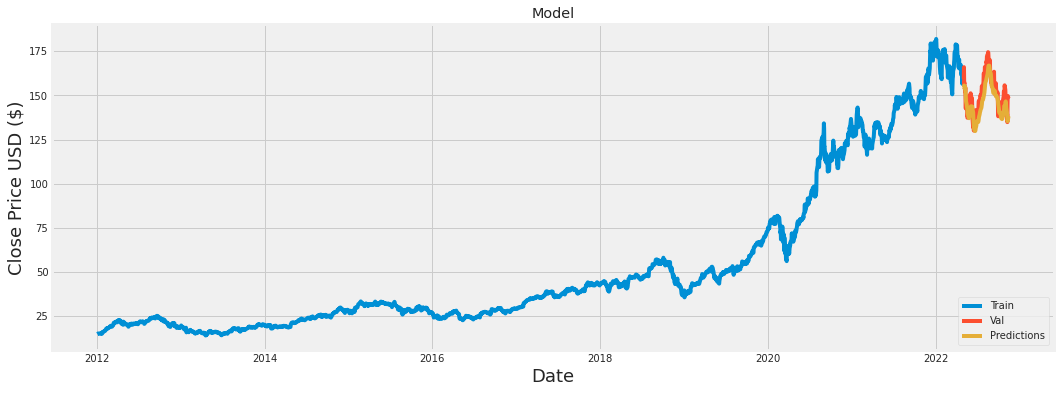

In [97]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [98]:
valid

,Close,Predictions
Date,,
2022-05-03,159.479996,154.633438
2022-05-04,166.020004,154.442673
2022-05-05,156.770004,155.639786
2022-05-06,157.279999,155.413864
2022-05-09,152.059998,154.835800
...,...,...
2022-11-08,139.500000,138.434097
2022-11-09,134.869995,137.035980
2022-11-10,146.869995,135.374283
